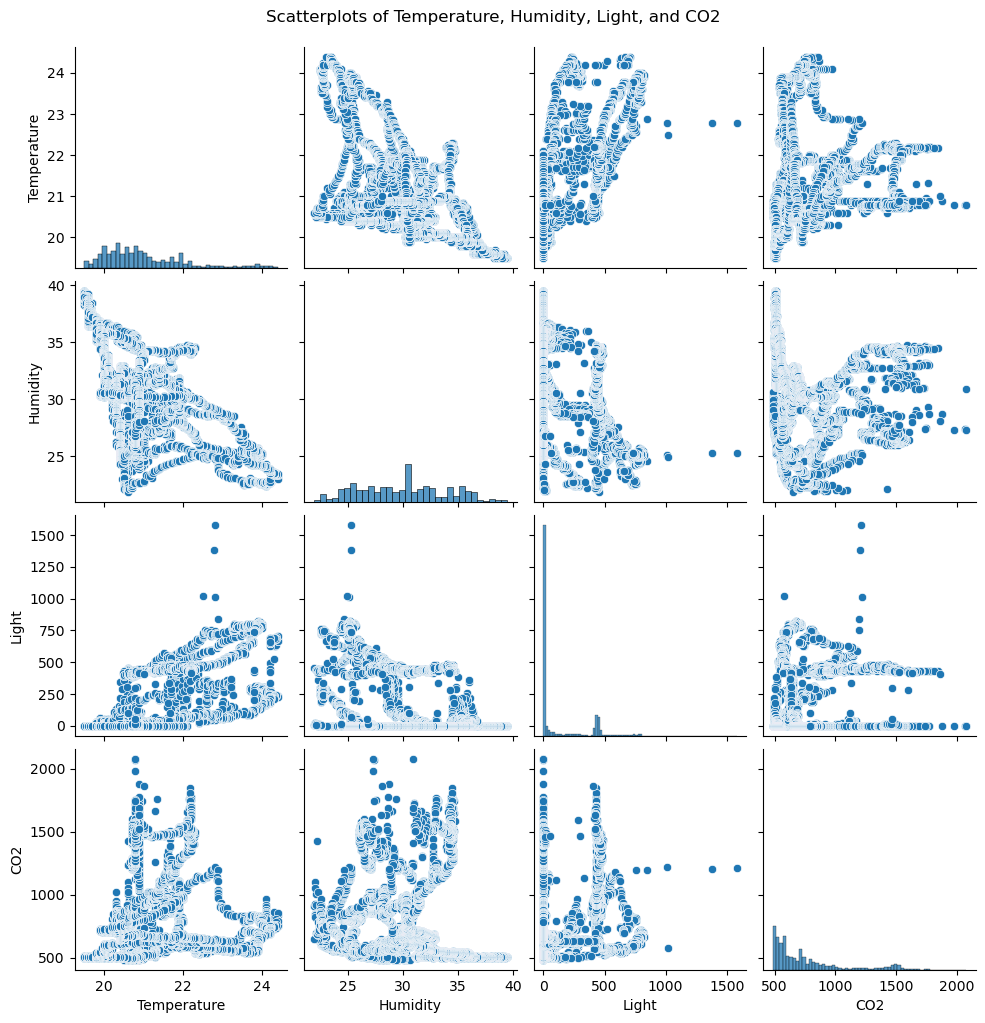

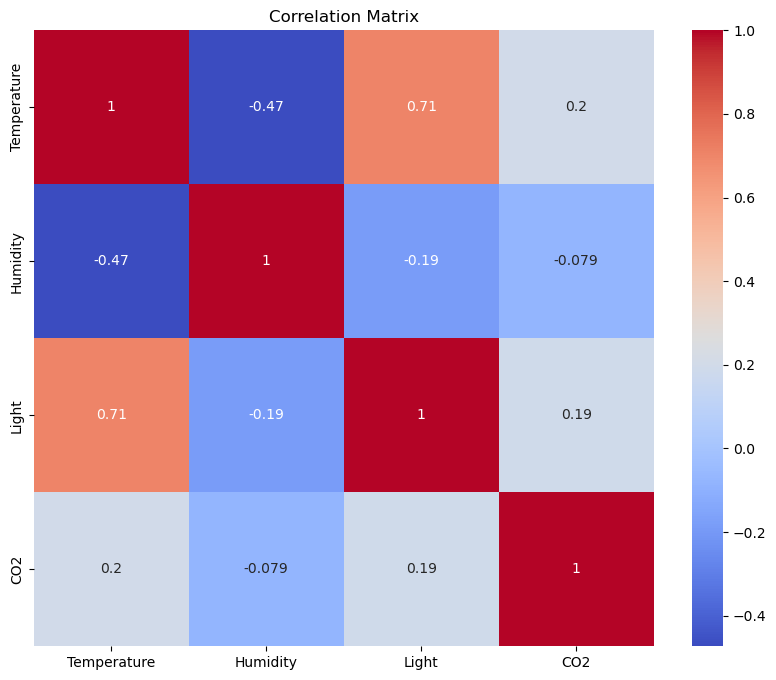

,date,Temperature,Humidity,Light,CO2
0,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667
1,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000
2,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000
3,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000
4,2015-02-11 14:51:00,21.7900,31.133333,437.333333,1005.666667


In [11]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_absolute_error
# Load the dataset
data = pd.read_csv('dataset.csv')

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])


# Task 1: Data Analysis
# Plot scatterplots and a correlation matrix
sns.pairplot(data.drop('date', axis=1))
plt.suptitle('Scatterplots of Temperature, Humidity, Light, and CO2', y=1.02)
correlation_matrix = data.drop('date', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
data.head()

In [4]:
# Stationarity Check using Augmented Dickey-Fuller test
def perform_adfuller_test(series):
    result = adfuller(series, autolag='AIC')
    df_output = pd.Series(result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in result[4].items():
        df_output[f'Critical Value ({key})'] = value
    return df_output

adf_test_result = perform_adfuller_test(data['CO2'])
print(adf_test_result)

Test Statistic                   -0.486375
p-value                           0.894648
#Lags Used                       34.000000
Number of Observations Used    9717.000000
Critical Value (1%)              -3.431023
Critical Value (5%)              -2.861837
Critical Value (10%)             -2.566928
dtype: float64


In [7]:
co2_data = data['CO2']
# Split data into train and test
split_point = int(0.7 * len(co2_data))
train, test = co2_data[:split_point], co2_data[split_point:]

from statsmodels.tsa.stattools import adfuller

# Use "adfuller" to understand if data is stationary
adf_result = adfuller(train)
print(adf_result)


(-4.289931796058798, 0.000462387497321171, 24, 6801, {'1%': -3.4313118835294487, '5%': -2.8619650732864534, '10%': -2.56699626275952}, 58841.84296674194)


In [8]:
from pmdarima import auto_arima

# Use "auto_arima" to find the best ARIMA model parameters
auto_model = auto_arima(train, seasonal=False, trace=True)
auto_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=59233.687, Time=3.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=60029.820, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=59997.355, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=59979.849, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=60027.837, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=59312.969, Time=2.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=59244.234, Time=2.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=59234.998, Time=12.52 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=59235.078, Time=4.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=59656.767, Time=2.53 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=59262.631, Time=4.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=59234.899, Time=5.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=59237.204, Time=4.30 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=59231.767, Time=1.42 sec
 ARIMA(1,1,2)(0,0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6826
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -29610.883
Date:                Mon, 15 Jan 2024   AIC                          59231.767
Time:                        16:02:59   BIC                          59265.909
Sample:                             0   HQIC                         59243.547
                               - 6826                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9575      0.008    124.925      0.000       0.943       0.973
ar.L2         -0.3979      0.007    -60.767      0.000      -0.411      -0.385
ma.L1         -0.9648      0.008   -116.149      0.000      -0.981      -0.949
ma.L2          0.1666      0.008     19.984      0.000       0.150       0.183
sigma2       343.5178      0.225   1524.480      0.000     343.076     343.959
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         689791308.86
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            24.25
Prob(H) (two-sided):                  0.00   Kurtosis:                      1559.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

date - Stationary: No (p-value: 1.0)
Temperature - Stationary: Yes (p-value: 0.01846670388727861)
Humidity - Stationary: No (p-value: 0.43309616383719274)
Light - Stationary: Yes (p-value: 0.0007926102878875505)
CO2 - Stationary: No (p-value: 0.894647926524341)
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=59233.687, Time=3.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=60029.820, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=59997.355, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=59979.849, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=60027.837, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=59312.969, Time=3.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=59244.234, Time=3.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=59234.998, Time=12.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=59235.078, Time=5.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=59656.767, Time=2.66 sec
 ARIMA(1,1,3)(0,0,0)[0] 

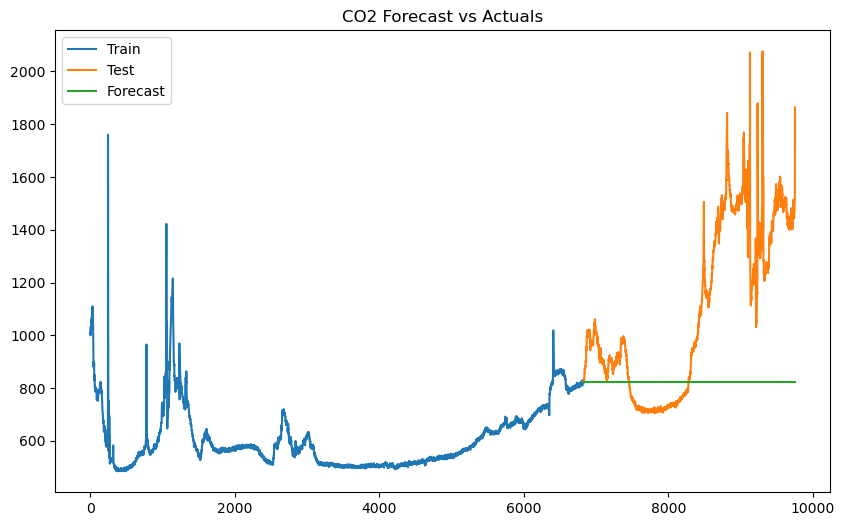

CO2 - MAE: 316.88838164096126


In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_absolute_error

# Stationarity checks for the entire dataset
stationarity_results = {}
for column in data.columns:
    adf_result = adfuller(data[column])
    stationarity_results[column] = adf_result[1]  # p-value

# Report stationarity
for column, p_value in stationarity_results.items():
    print(f'{column} - Stationary: {"Yes" if p_value < 0.05 else "No"} (p-value: {p_value})')

# Forecasting specifically for CO2 data
column = 'CO2'  # The column we want to forecast
train_size = int(len(data) * 0.7)
train, test = data[column].iloc[:train_size], data[column].iloc[train_size:]

# Find best ARIMA model parameters for CO2 data
best_model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
print(f'Best ARIMA model for {column}: {best_model.order}')

# Fit ARIMA model for CO2 data
model = ARIMA(train, order=best_model.order)
fitted_model = model.fit()

# Forecast CO2 data
forecast = fitted_model.forecast(steps=len(test))

# Plot forecast against actual values for CO2 data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.title(f'{column} Forecast vs Actuals')
plt.legend()
plt.savefig(r'C:\Users\Lenovo\forecast_vs_actuals_CO2.png')
plt.show()

# Calculate MAE for CO2 data
mae = mean_absolute_error(test, forecast)
print(f'{column} - MAE: {mae}')

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\

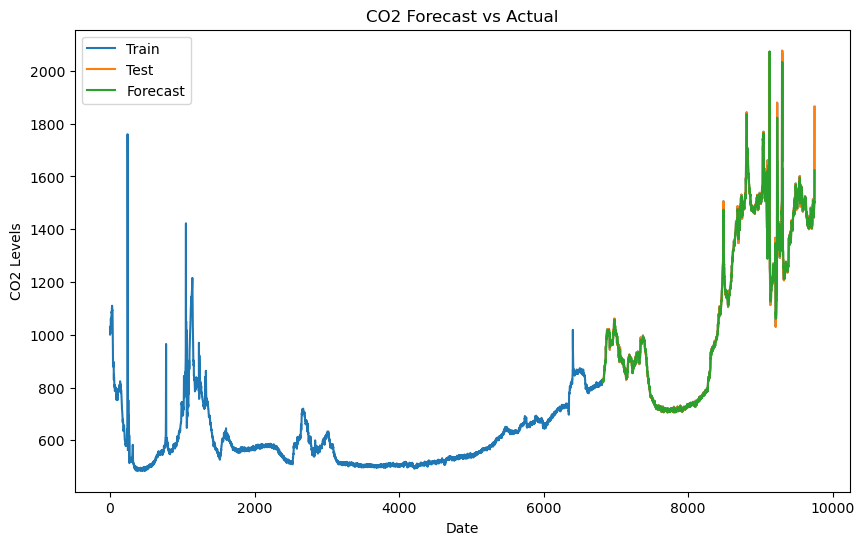

Mean Absolute Error (MAE): 9.35


In [13]:
# Very high MAE CO2 - MAE: 316.88838164096126
# Forecasting WITH stepwise approach to decrease MAE error

forecast = []

for t in test:
    # Fit the model
    model = ARIMA(train, order=(2,1,2))
    model_fit = model.fit()
    
    # For each data point in the test set, forecast the next step
    forecast_value = model_fit.forecast(steps=1)
    forecast.append(forecast_value.iloc[0])

    # Update with the actual observed value
    new_data = pd.Series([t], index=[test.index[len(forecast) - 1]])
    train = pd.concat([train, new_data])

# Compare the forecasted values with the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.title('CO2 Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()

# MAE
MAE = np.mean(abs(forecast - test))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE, 2)))

In [ ]:
# Now the Mean Absolute Error hs decreased till 9.35 after performing stepwise forecasting.